In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from global_import import *
from fm import fama_macbeth_reg_panel_nw

In [19]:
ret_decomp_dcf5_hist = pd.read_csv(f'{DATA_FOLDER}/decomp_dcf5y_hist_1980_2014.csv', index_col=0).replace([np.inf, -np.inf], np.nan)
ret_decomp_dcf5_RF = pd.read_csv(f'{DATA_FOLDER}/decomp_dcf5y_RF_rolling_1980_2019.csv', index_col=0).replace([np.inf, -np.inf], np.nan)


/Users/mmw/Installations/venvs/mlval/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
ret_decomp_dcf5_hist = ret_decomp_dcf5_hist[ret_decomp_dcf5_hist.year<=2014]
ret_decomp_dcf5_hist = ret_decomp_dcf5_hist[ret_decomp_dcf5_hist.prc>5]
ret_decomp_dcf5_hist['jdate'] = pd.to_datetime(ret_decomp_dcf5_hist['jdate'])

ret_decomp_dcf5_RF = ret_decomp_dcf5_RF[ret_decomp_dcf5_RF.year<=2014]
ret_decomp_dcf5_RF = ret_decomp_dcf5_RF[ret_decomp_dcf5_RF.prc>5]
ret_decomp_dcf5_RF['jdate'] = pd.to_datetime(ret_decomp_dcf5_RF['jdate'])

<AxesSubplot:>

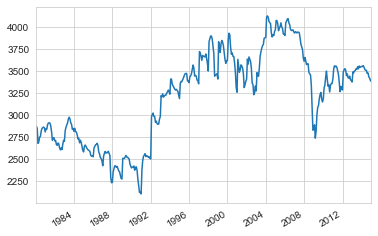

In [21]:
ret_decomp_dcf5_hist.jdate.value_counts().plot()

<AxesSubplot:>

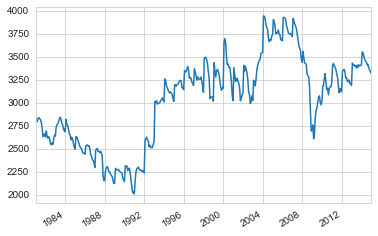

In [22]:
ret_decomp_dcf5_RF.jdate.value_counts().plot()

In [23]:
mdf = ret_decomp_dcf5_hist[['permno', 'jdate']].merge(ret_decomp_dcf5_RF, on=['permno', 'jdate'], how='inner')

<AxesSubplot:>

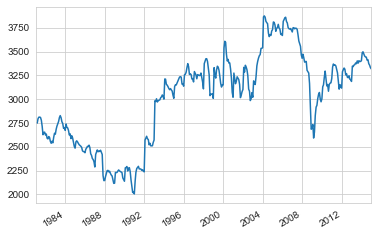

In [24]:
mdf.jdate.value_counts().plot()

<AxesSubplot:>

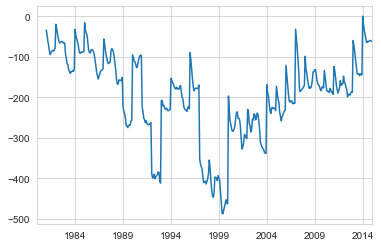

In [25]:
(ret_decomp_dcf5_RF.jdate.value_counts() - ret_decomp_dcf5_hist.jdate.value_counts()).plot()

In [18]:
ret_decomp_dcf5_hist[ret_decomp_dcf5_hist]

,permno,ticker,exchcd,year,jdate,exchcd.1,vt,me,be,prc,logret_3,logret_6,logret_24,cumret_3,cumret_6,cumret_24,logret_12,logret_36,logret_48,logret_60,cumret_12,cumret_36,cumret_48,cumret_60,vt+3,me+3,be+3,vt+6,me+6,be+6,vt+12,me+12,be+12,vt+24,me+24,be+24,vt+36,me+36,be+36,vt+48,me+48,be+48,vt+60,me+60,be+60,r_t+3,r*_t+3,r_unchg+3,r_chg+3,r_t+6,r*_t+6,r_unchg+6,r_chg+6,r_t+12,r*_t+12,r_unchg+12,r_chg+12,r_t+24,r*_t+24,r_unchg+24,r_chg+24,r_t+36,r*_t+36,r_unchg+36,r_chg+36,r_t+48,r*_t+48,r_unchg+48,r_chg+48,r_t+60,r*_t+60,r_unchg+60,r_chg+60,misp
287,10001,EGAS,2,2014,2014-12-31,2,9.083331,11.657699,106669.0,11.0200,-0.087672,-0.054105,0.222733,-0.083938,-0.052667,0.249487,-0.331516,-0.165001,-0.165001,-0.165001,-0.282165,-0.152107,-0.152107,-0.152107,8.553669,11.553126,106962.0,8.553669,11.590608,106962.0,8.553669,11.267821,106962.0,6.240276,11.790754,107784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.087672,-0.529662,-0.064359,0.414462,-0.054105,-0.529662,-0.064359,0.451007,-0.331516,-0.529662,-0.064359,0.136289,0.222733,-2.843055,-0.064359,2.901708,-0.165001,NaN,-0.064359,NaN,-0.165001,NaN,-0.064359,NaN,-0.165001,NaN,-0.064359,NaN,2.574368
286,10001,EGAS,2,2014,2014-11-30,2,9.083331,11.700334,106669.0,11.5000,-0.125736,-0.122224,0.174223,-0.118153,-0.115050,0.190321,-0.228339,-0.203561,-0.203561,-0.203561,-0.204145,-0.184179,-0.184179,-0.184179,8.553669,11.570522,106962.0,8.553669,11.560572,106962.0,8.553669,11.427517,106962.0,6.240276,11.786762,107784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.125736,-0.529662,-0.065425,0.389854,-0.122224,-0.529662,-0.065425,0.380153,-0.228339,-0.529662,-0.065425,0.250424,0.174223,-2.843055,-0.065425,2.856246,-0.203561,NaN,-0.065425,NaN,-0.203561,NaN,-0.065425,NaN,-0.203561,NaN,-0.065425,NaN,2.617003
285,10001,EGAS,2,2014,2014-10-31,2,9.083331,11.687205,106669.0,11.3500,-0.143970,-0.098213,0.179185,-0.134086,-0.093545,0.196242,-0.202192,-0.186526,-0.186526,-0.186526,-0.183062,-0.170163,-0.170163,-0.170163,8.553669,11.535254,106962.0,8.553669,11.564109,106962.0,8.553669,11.436152,106962.0,6.240276,11.774690,107784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.143970,-0.529662,-0.065097,0.368269,-0.098213,-0.529662,-0.065097,0.396403,-0.202192,-0.529662,-0.065097,0.271645,0.179185,-2.843055,-0.065097,2.857277,-0.186526,NaN,-0.065097,NaN,-0.186526,NaN,-0.065097,NaN,-0.186526,NaN,-0.065097,NaN,2.603874
284,10001,EGAS,2,2014,2014-09-30,2,9.083331,11.726934,106669.0,11.8100,-0.057297,-0.144969,-0.338981,-0.055687,-0.134951,-0.287504,-0.239641,-0.222298,-0.222298,-0.222298,-0.213089,-0.199323,-0.199323,-0.199323,9.083331,11.657699,106669.0,8.553669,11.553126,106962.0,8.553669,11.449666,106962.0,6.240276,11.297970,107784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.057297,0.000000,-0.066090,-0.067504,-0.144969,-0.529662,-0.066090,0.346958,-0.239641,-0.529662,-0.066090,0.246085,-0.338981,-2.843055,-0.066090,2.353739,-0.222298,NaN,-0.066090,NaN,-0.222298,NaN,-0.066090,NaN,-0.222298,NaN,-0.066090,NaN,2.643602
283,10001,EGAS,2,2014,2014-08-31,2,9.083331,11.681018,106669.0,11.2800,0.030981,-0.094755,-0.330519,0.031466,-0.090404,-0.281450,-0.193283,-0.172580,-0.172580,-0.172580,-0.175752,-0.158509,-0.158509,-0.158509,9.083331,11.700334,106669.0,8.553669,11.570522,106962.0,8.553669,11.446305,106962.0,6.240276,11.256713,107784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030981,0.000000,-0.064942,0.018833,-0.094755,-0.529662,-0.064942,0.408687,-0.193283,-0.529662,-0.064942,0.287575,-0.330519,-2.843055,-0.064942,2.358282,-0.172580,NaN,-0.064942,NaN,-0.172580,NaN,-0.064942,NaN,-0.172580,NaN,-0.064942,NaN,2.597687
282,10001,EGAS,2,2014,2014-07-31,2,9.083331,11.814439,106669.0,12.8900,-0.115493,-0.259463,-0.495924,-0.109073,-0.228534,-0.390992,-0.204316,0.128764,-0.302019,-0.302019,-0.184795,0.137422,-0.260676,-0.260676,9.083331,11.687205,106669.0,8.553669,11.535254,106962.0,8.553669,11.564044,106962.0,6.240276,11.220368,107784.0,NaN,11.822129,104237.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.115493,0.000000,-0.068278,-0.124053,-0.259463,-0.